In [1]:
import os
import jax
import jax.numpy as jnp
import jax.random as jrand

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from graphax.perf import plot_performance
from graphax.examples import PropaneCombustion

PPO_PropaneCombustion_1337.csv (1500,)
PPO_PropaneCombustion_123.csv (1500,)
PPO_PropaneCombustion_1743.csv (1500,)
PPO_PropaneCombustion_42.csv (1500,)
PPO_PropaneCombustion_541.csv (1500,)
PPO_PropaneCombustion_250197.csv (1500,)


/tmp/ipykernel_1494715/2642139600.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


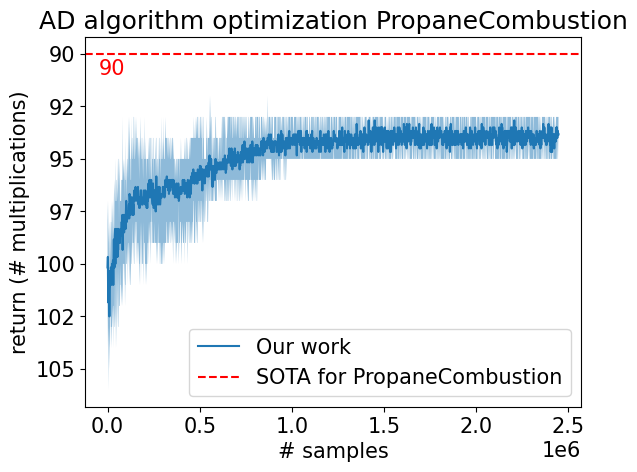

In [26]:
font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 15}

plt.rc("font", **font)

path = "PPO_data/" # "A0_data/" # 
l = 1500 # 1500 

runs = []
for file in os.listdir(path=os.path.join(os.getcwd(), path)):
				if file.endswith(".csv"):
								data = np.genfromtxt(os.path.join(os.getcwd(), path, file), delimiter=",", skip_header=1)
								num_samples = data[:l, 0]*32*51
								num_muls = data[:l, 1]
								print(file, num_muls.shape)
								runs.append(num_muls)

data = jnp.stack(runs, axis=0)

data_mean = jnp.mean(data, axis=0)
data_max = jnp.max(data, axis=0)
data_min	= jnp.min(data, axis=0)
data_err = jnp.stack([data_min, data_max], axis=0)


fig, ax = plt.subplots()
ax.plot(num_samples, data_mean, label="Our work")
ax.fill_between(num_samples, data_min, data_max, alpha=0.5)
ax.axhline(y=-90., color="r", linestyle="--", label="SOTA for PropaneCombustion")
ax.annotate("90", (num_samples[0], -90), textcoords="offset points", xytext=(3, -15), ha="center", color="red")
ax.set_xlabel("# samples")
ax.set_ylabel("return (# multiplications)")
ax.set_title("AD algorithm optimization PropaneCombustion")

ticks = ax.get_yticks()
labels = ax.get_yticklabels()
labels = [str(int(-t)) for t in ticks]
ax.set_yticklabels(labels)

ax.legend(loc="lower right")

In [3]:
order = [12, 51, 33, 45, 10, 9, 42, 39, 1, 18, 27, 8, 61, 60, 48, 59, 36, 35, 
        34, 24, 26, 30, 23, 44, 43, 58, 50, 32, 40, 57, 56, 55, 54, 28, 38, 20, 
        21, 3, 15, 7, 2, 29, 17, 53, 5, 47,  6, 16, 14, 11, 49]

mM_order = [1, 5, 11, 14, 15, 20, 27, 28, 33, 34, 39, 42, 47, 48, 50, 3, 6, 8, 
            10, 16, 18, 21, 23, 24, 26, 29, 32, 35, 38, 43, 44, 49, 53, 55, 57, 
            59, 61, 2, 7, 12, 17, 30, 36, 40, 45, 51, 54, 58, 9, 56, 60]

12 : 1024
51 : 1024
33 : 512
45 : 1024
10 : 1024
9 : 1024
42 : 512
39 : 512
1 : 512
18 : 1024
27 : 512
8 : 1024
61 : 1024
60 : 1024
48 : 512
59 : 1024
36 : 1024
35 : 1024
34 : 512
24 : 1024
26 : 1024
30 : 1024
23 : 1024
44 : 1024
43 : 1024
58 : 1024
50 : 512
32 : 1024
40 : 1024
57 : 1024
56 : 1024
55 : 1024
54 : 1024
28 : 512
38 : 1024
20 : 512
21 : 1024
3 : 1024
15 : 512
7 : 1024
2 : 1536
29 : 1024
17 : 1024
53 : 1024
5 : 512
47 : 512
6 : 1024
16 : 1024
14 : 512
11 : 512
49 : 1024


100%|██████████| 1000/1000 [00:44<00:00, 22.64it/s]


1 : 512
5 : 512
11 : 512
14 : 512
15 : 512
20 : 512
27 : 512
28 : 512
33 : 512
34 : 512
39 : 512
42 : 512
47 : 512
48 : 512
50 : 512
3 : 1024
6 : 1024
8 : 1024
10 : 1024
16 : 1024
18 : 1024
21 : 1024
23 : 1024
24 : 1024
26 : 1024
29 : 1024
32 : 1024
35 : 1024
38 : 1024
43 : 1024
44 : 1024
49 : 1024
53 : 1024
55 : 1024
57 : 1024
59 : 1024
61 : 1024
2 : 1536
7 : 1536
12 : 1536
17 : 1536
30 : 1536
36 : 1536
40 : 1536
45 : 1536
51 : 1536
54 : 1536
58 : 1536
9 : 2560
56 : 2560
60 : 4608


100%|██████████| 1000/1000 [00:44<00:00, 22.24it/s]


61 : 1024
60 : 1024
59 : 1024
58 : 1024
57 : 1024
56 : 1024
55 : 1024
54 : 1024
53 : 1024
51 : 1024
50 : 512
49 : 1024
48 : 512
47 : 512
45 : 1024
44 : 1024
43 : 1024
42 : 512
40 : 1024
39 : 512
38 : 1024
36 : 1024
35 : 1024
34 : 512
33 : 512
32 : 1024
30 : 1024
29 : 1024
28 : 512
27 : 512
26 : 1024
24 : 1024
23 : 1024
21 : 1024
20 : 512
18 : 1024
17 : 1024
16 : 1024
15 : 512
14 : 512
12 : 1024
11 : 512
10 : 1024
9 : 1024
8 : 1024
7 : 1024
6 : 1024
5 : 512
3 : 1024
2 : 1536
1 : 1536


100%|██████████| 1000/1000 [00:42<00:00, 23.44it/s]


1 : 512
2 : 1536
3 : 1024
5 : 512
6 : 1024
7 : 1536
8 : 2048
9 : 2560
10 : 3072
11 : 512
12 : 3584
14 : 512
15 : 512
16 : 1024
17 : 1536
18 : 2048
20 : 512
21 : 1024
23 : 1024
24 : 1024
26 : 1024
27 : 1024
28 : 512
29 : 1024
30 : 1536
32 : 1024
33 : 1024
34 : 512
35 : 1024
36 : 1536
38 : 1024
39 : 1024
40 : 1536
42 : 512
43 : 1024
44 : 1024
45 : 1536
47 : 512
48 : 512
49 : 1024
50 : 1024
51 : 1536
53 : 1024
54 : 1536
55 : 2048
56 : 2560
57 : 3072
58 : 3584
59 : 4096
60 : 4608
61 : 5120


100%|██████████| 1000/1000 [00:43<00:00, 23.13it/s]


fwd mean: 36.409950256347656, rev mean: 35.9559326171875, mM mean: 37.86076736450195, cc mean: 37.218017578125
fwd err: [-0.38180923  1.1271553 ], rev err: [-0.35170364  0.4726715 ], mM err: [-0.7528763  0.7840233], cc err: [-0.66409683  0.94106674]


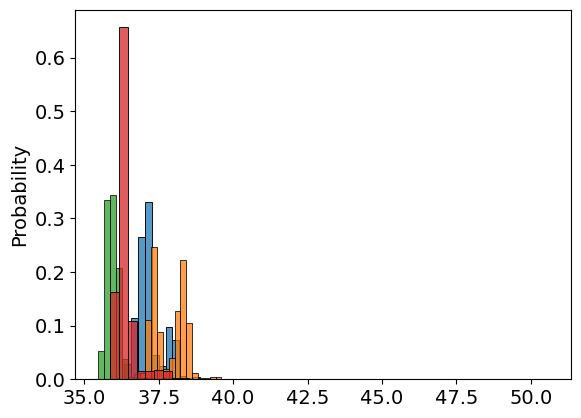

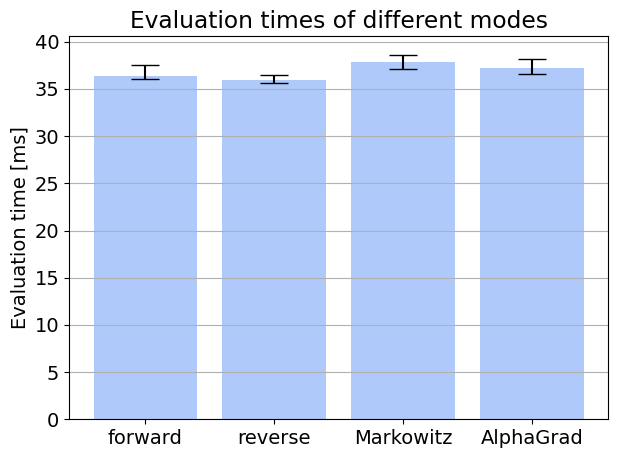

In [11]:
shape = (512,)
xs = [.01]*11
xs = [jnp.ones(shape)*x for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
plot_performance(PropaneCombustion, xs, order, mM_order, "./RoeFlux.png", samplesize=1000)

  0%|          | 0/110 [00:00<?, ?it/s]

100%|██████████| 110/110 [00:57<00:00,  1.92it/s]


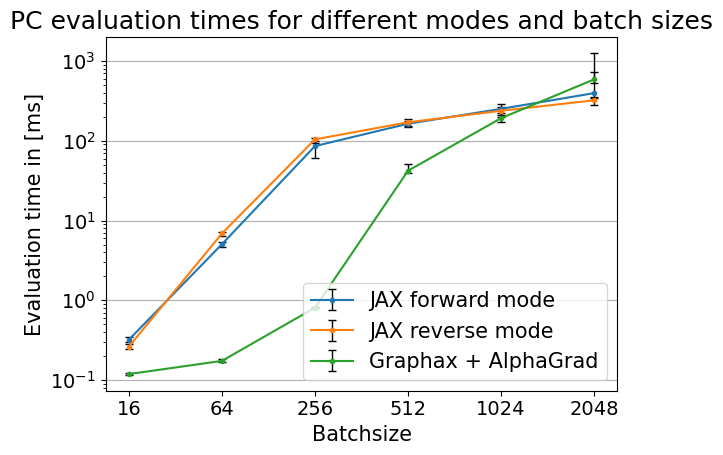

In [5]:
from graphax.perf import plot_performance_over_size_jax

shapes = (16, 64, 256, 512, 1024, 2048)
key = jrand.PRNGKey(1234)
xs = [.01]*11
xs = [[jrand.uniform(key, (shape,))*x for x in xs] for shape in shapes]
xs = jax.device_put(xs, jax.devices("cpu")[0])

plot_performance_over_size_jax(PropaneCombustion, xs, order, "PC", ticks=shapes, samplesize=110)